<a href="https://colab.research.google.com/github/Bhanu2900/VOIS_AICTE_Oct2025_MajorProject_Bhanu_Pratap/blob/main/netflix_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [ ]:
# Load Dataset - Assuming the file "Netflix Dataset.csv" is uploaded to the Colab environment
try:
    df = pd.read_csv("/content/Netflix Dataset (2).csv")
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: '/content/Netflix Dataset (2).csv' not found. Please upload the file to your Colab environment.")
    # Exit or handle gracefully if file is missing
    # raise

# Quick look at dataset
print("\nShape of Dataset:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing Values (Before Cleaning):\n", df.isnull().sum())

# Display the first few rows
print("\nFirst 5 rows of the dataset:")
print(df.head())

Dataset loaded successfully.

Shape of Dataset: (7789, 11)

Columns: ['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country', 'Release_Date', 'Rating', 'Duration', 'Type', 'Description']

Missing Values (Before Cleaning):
 Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

First 5 rows of the dataset:
  Show_Id Category  Title           Director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie  07:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                Cast        Country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexi

In [ ]:
# Convert Release_Date to datetime and extract Year
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df['Year'] = df['Release_Date'].dt.year

# Handle missing values
# Filling missing categorical data with 'Unknown' or 'Not Rated'
df['Director'] = df['Director'].fillna("Unknown")
df['Cast'] = df['Cast'].fillna("Unknown")
# The 'Country' column often lists multiple countries. We'll fill NaNs with 'Unknown'
df['Country'] = df['Country'].fillna("Unknown")
df['Rating'] = df['Rating'].fillna("Not Rated")

# Extract Main Genre (first genre listed in 'Type')
# The original column is named 'Type', but seems to contain 'Genre' information (e.g., 'Action & Adventure, Sci-Fi').
# Renaming 'Type' to 'Genre_List' for clarity if you were to continue working with it, but sticking to 'Type' for now.
df['Main_Genre'] = df['Type'].apply(lambda x: x.split(",")[0].strip() if pd.notnull(x) else "Unknown")

# Handle rows where 'Year' could not be extracted (very few likely)
df.dropna(subset=['Year'], inplace=True)
df['Year'] = df['Year'].astype(int)

print("Data Cleaning and Feature Engineering complete.")
print("\nMissing Values (After Cleaning):\n", df.isnull().sum())
print("\nExample of 'Main_Genre' extraction:")
print(df[['Type', 'Main_Genre']].head())

Data Cleaning and Feature Engineering complete.

Missing Values (After Cleaning):
 Show_Id         0
Category        0
Title           0
Director        0
Cast            0
Country         0
Release_Date    0
Rating          0
Duration        0
Type            0
Description     0
Year            0
Main_Genre      0
dtype: int64

Example of 'Main_Genre' extraction:
                                                Type              Main_Genre
0  International TV Shows, TV Dramas, TV Sci-Fi &...  International TV Shows
1                       Dramas, International Movies                  Dramas
2                Horror Movies, International Movies           Horror Movies
3  Action & Adventure, Independent Movies, Sci-Fi...      Action & Adventure
4                                             Dramas                  Dramas


In [ ]:
print("--- Exploratory Data Analysis (EDA) Summary ---")

# Count of Movies vs TV Shows
category_counts = df['Category'].value_counts()
print("\nCategory Distribution:\n", category_counts)

# Top Countries (excluding 'Unknown' for more meaningful insight)
top_countries = df[df['Country'] != "Unknown"]['Country'].str.split(',', expand=True).stack().str.strip().value_counts().head(5)
print("\nTop 5 Content-Producing Countries (based on titles listed):\n", top_countries)

# Dataset span (years)
print("\nDataset covers years from **{}** to **{}**.".format(df['Year'].min(), df['Year'].max()))

# Top 5 Genres
top_5_genres = df['Main_Genre'].value_counts().head(5)
print("\nTop 5 Main Genres:\n", top_5_genres)

--- Exploratory Data Analysis (EDA) Summary ---

Category Distribution:
 Category
Movie      5379
TV Show    2312
Name: count, dtype: int64

Top 5 Content-Producing Countries (based on titles listed):
 United States     3251
India              989
United Kingdom     704
Canada             399
France             345
Name: count, dtype: int64

Dataset covers years from **2008** to **2021**.

Top 5 Main Genres:
 Main_Genre
Dramas                    1385
Comedies                  1075
Documentaries              751
Action & Adventure         721
International TV Shows     677
Name: count, dtype: int64


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


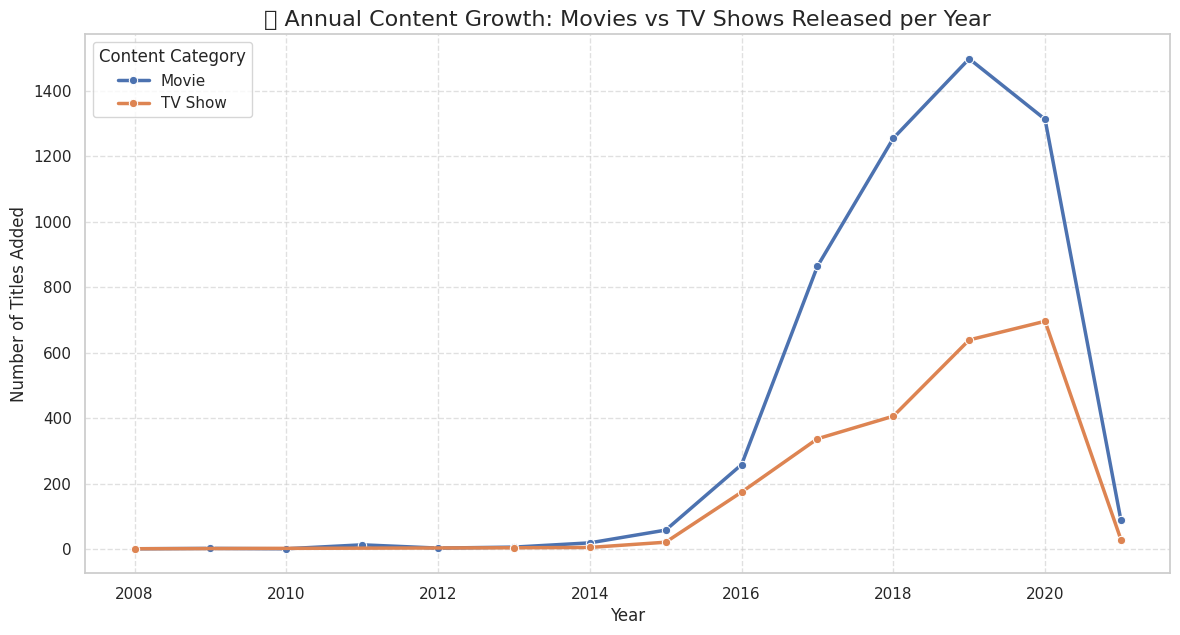

In [ ]:
# 1. Line Chart – Movies vs. TV Shows released per year
content_trend = df.groupby(['Year', 'Category']).size().reset_index(name='Count')

plt.figure(figsize=(14, 7))
sns.lineplot(data=content_trend, x='Year', y='Count', hue='Category', marker='o', linewidth=2.5)
plt.title("📈 Annual Content Growth: Movies vs TV Shows Released per Year", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Titles Added", fontsize=12)
plt.legend(title="Content Category", loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

/tmp/ipython-input-1691436120.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128285 (\N{TOP WITH UPWARDS ARROW ABOVE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


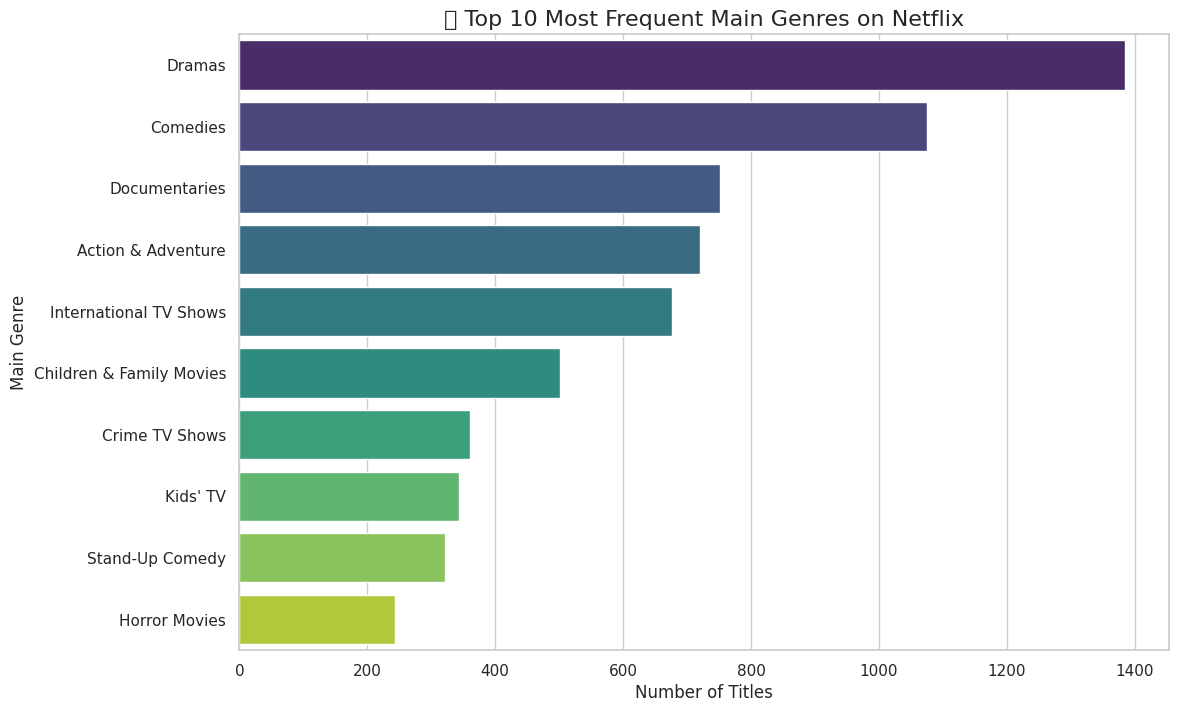

In [ ]:
# 2. Bar Chart – Top 10 Genres
top_genres = df['Main_Genre'].value_counts().head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")
plt.title("🔝 Top 10 Most Frequent Main Genres on Netflix", fontsize=16)
plt.xlabel("Number of Titles", fontsize=12)
plt.ylabel("Main Genre", fontsize=12)
plt.show()

/tmp/ipython-input-3105713286.py:17: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


<Figure size 1400x700 with 0 Axes>

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


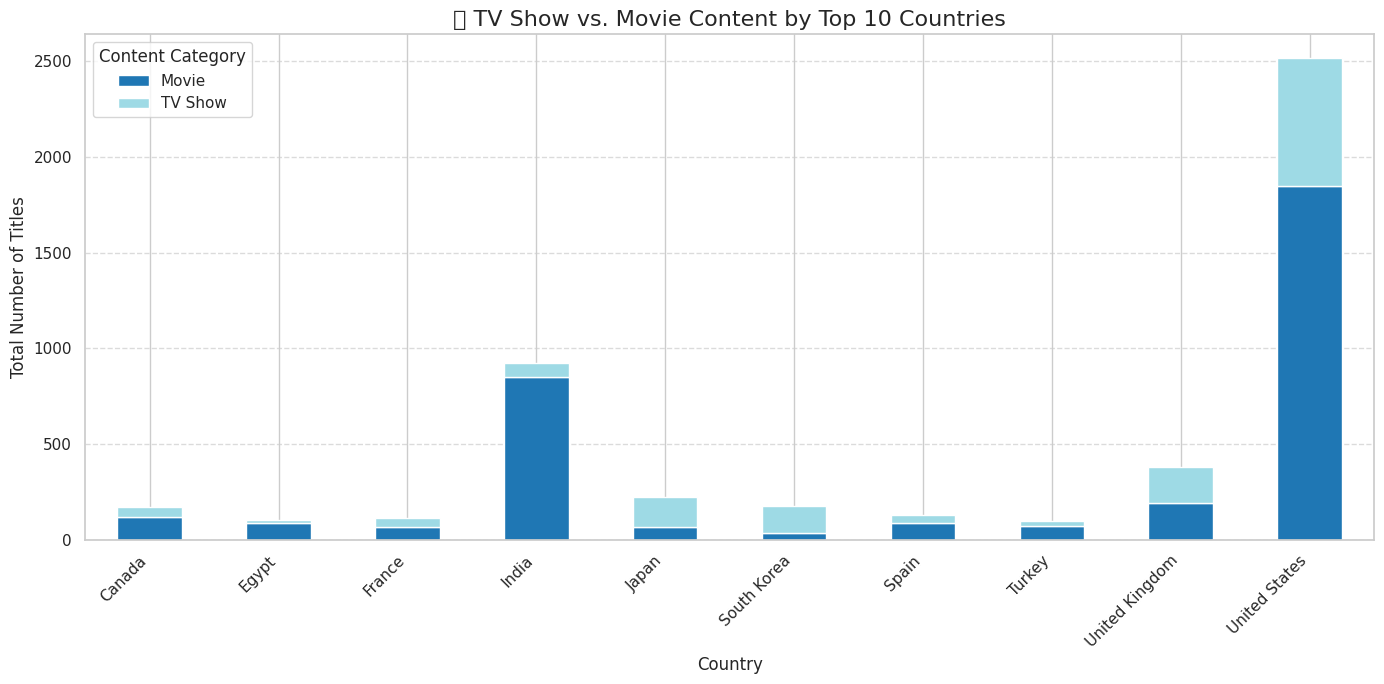

In [ ]:
# 3. Stacked Bar Chart – Movies vs TV Shows per Country (Top 10 countries)
# Re-calculating top countries considering 'Unknown' has been filled
top_countries = df[df['Country'] != "Unknown"]['Country'].value_counts().head(10).index

# Filter data for only these top countries
country_data = df[df['Country'].isin(top_countries)]
stacked = country_data.groupby(['Country', 'Category']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 7))
stacked.plot(kind='bar', stacked=True, figsize=(14, 7), colormap="tab20")
plt.title("🎬 TV Show vs. Movie Content by Top 10 Countries", fontsize=16)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Total Number of Titles", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Content Category")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# 4. Choropleth Map – Country-wise Content (Focusing on primary country only for map)
# To simplify the map, we use the first country listed.
df['Primary_Country'] = df['Country'].apply(lambda x: x.split(",")[0].strip() if x != "Unknown" else "Unknown")
country_counts = df[df['Primary_Country'] != "Unknown"]['Primary_Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']

fig = px.choropleth(country_counts, locations="Country", locationmode="country names",
                    color="Count", hover_name="Country",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="🌎 Geographic Distribution of Netflix Content (by Primary Country)",
                    template="plotly_dark")
fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0}) # Clean up margins
fig.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.



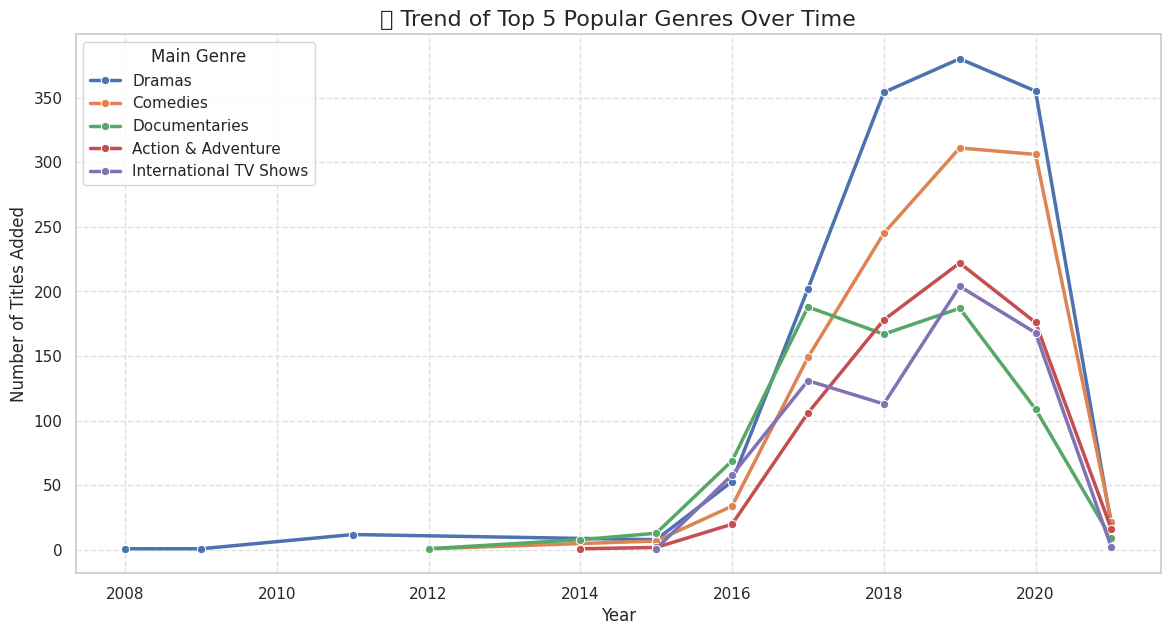

In [ ]:
# 5. Trend Line – Growth of Popular Genres Over Time
popular_genres = df['Main_Genre'].value_counts().head(5).index
genre_trends = df[df['Main_Genre'].isin(popular_genres)].groupby(['Year', 'Main_Genre']).size().reset_index(name='Count')

plt.figure(figsize=(14, 7))
sns.lineplot(data=genre_trends, x='Year', y='Count', hue='Main_Genre', marker="o", linewidth=2.5)
plt.title("⏳ Trend of Top 5 Popular Genres Over Time", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Titles Added", fontsize=12)
plt.legend(title="Main Genre", loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()